# Hungarian Assignment
This jupyter notebook is to test and verify hungarian assignment with a set of detections and particle means. The hungarian assignment algorithm will be used from scipy's optimize library: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.linear_sum_assignment.html

In [15]:
### Libraries to Load ###
import numpy as np
import scipy
import matplotlib.pyplot as plt

from scipy.spatial import distance_matrix
from scipy.optimize import linear_sum_assignment

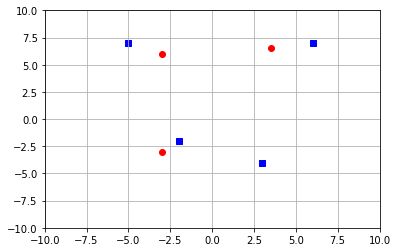

In [25]:
### Setup SIM params
detection_centers = np.array([[-5, 7],
                           [-2, -2],
                           [3, -4],
                           [6, 7]])
particle_simulated_means = np.array([[-3, 6],
                                    [-3,-3],
                                    [3.5,6.5]])

### Plot SIM setup
xlim = (-10, 10)
ylim = (-10, 10)
plt.figure()
plt.scatter(detection_centers[:,0],
        detection_centers[:,1],
        marker='s',
        color='b')
plt.scatter(particle_simulated_means[:,0],
           particle_simulated_means[:,1],
           color='r')
plt.xlim(*xlim)
plt.ylim(*ylim)
plt.grid(True)

In [27]:
### Hungarian assigment
# Rows are workers
# Col: Job
# First we need to create an distance graph with every particle mean and every detection.
# This will be the cost matrix for the hungarian assignment
print("Detection matrix dimension: ", detection_centers.shape)
print("Particle simulated mean matrix dimension: ", particle_simulated_means.shape)

euclidean_distance_matrix = distance_matrix(particle_simulated_means, detection_centers)
print("Euclidean matrix shape: ", euclidean_distance_matrix.shape)
print(euclidean_distance_matrix)


Detection matrix dimension:  (4, 2)
Particle simulated mean matrix dimension:  (3, 2)
Euclidean matrix shape:  (3, 4)
[[ 2.23606798  8.06225775 11.66190379  9.05538514]
 [10.19803903  1.41421356  6.08276253 13.45362405]
 [ 8.51469318 10.12422837 10.51189802  2.54950976]]


In [37]:
## Time for the hungarian assignment
# Pipe euclidean cost matrix into scipy hungarian assignment
row_ind, col_ind = linear_sum_assignment(euclidean_distance_matrix)
print("Col ind: ", col_ind)

print("Optimal pairing: ")
print("mean --> detection center")

for i in range(len(particle_simulated_means)):
    print(particle_simulated_means[i], "-->", detection_centers[col_ind[i]])

Col ind:  [0 1 3]
Optimal pairing: 
mean --> detection center
[-3.  6.] --> [-5  7]
[-3. -3.] --> [-2 -2]
[3.5 6.5] --> [6 7]


In [63]:
assigned_detections = np.array([detection_centers[col_ind[i]] for i in range(len(col_ind))])
print("Assigned Detection Centers: \n", assigned_detections)
print("Detection Centers: \n", detection_centers)


unassigned_detections = np.delete(detection_centers, col_ind, axis=0)
print("Unassigned Detections: \n", unassigned_detections)

def asvoid(arr):
    """
    View the array as dtype np.void (bytes)
    This views the last axis of ND-arrays as bytes so you can perform comparisons on
    the entire row.
    http://stackoverflow.com/a/16840350/190597 (Jaime, 2013-05)
    Warning: When using asvoid for comparison, note that float zeros may compare UNEQUALLY
    >>> asvoid([-0.]) == asvoid([0.])
    array([False], dtype=bool)
    """
    arr = np.ascontiguousarray(arr)
    return arr.view(np.dtype((np.void, arr.dtype.itemsize * arr.shape[-1])))


def in1d_index(a, b):
    voida, voidb = map(asvoid, (a, b))
    return np.where(np.in1d(voidb, voida))[0]    

def ismember_rows(a, b):
    '''Equivalent of 'ismember' from Matlab
    a.shape = (nRows_a, nCol)
    b.shape = (nRows_b, nCol)
    return the idx where b[idx] == a
    '''
    return np.nonzero(np.all(b == a[:,np.newaxis], axis=2))[1]



Assigned Detection Centers: 
 [[-5  7]
 [-2 -2]
 [ 6  7]]
Detection Centers: 
 [[-5  7]
 [-2 -2]
 [ 3 -4]
 [ 6  7]]
Unassigned Detections: 
 [[ 3 -4]]
